<a href="https://colab.research.google.com/github/RodSalg/IA_tests_and_Apps/blob/main/Test1_CNN_LeNet-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet-5 Model

Let's implement the Convolutional Neural Network (CNN) to classify images.

We'll use the LNet-5 architecture ([paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)).

We will work with CIFAR-10 dataset. That consists of 60000 32x32x3 colour images in 10 classes.

<center>
    <img src="https://world4jason.gitbooks.io/research-log/content/deepLearning/CNN/img/lenet.png" />
</center>

# Import libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint


# Prepare the data

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

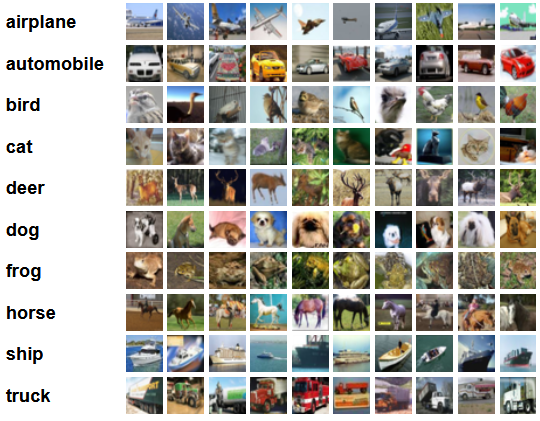

Load CIFAR-10 dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Verify the data type

In [ ]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

Verify the data shape

In [ ]:
x_train.shape

(50000, 32, 32, 3)

Check the class type (output) of the input.

In [ ]:
y_train[1]

array([9], dtype=uint8)

View the image

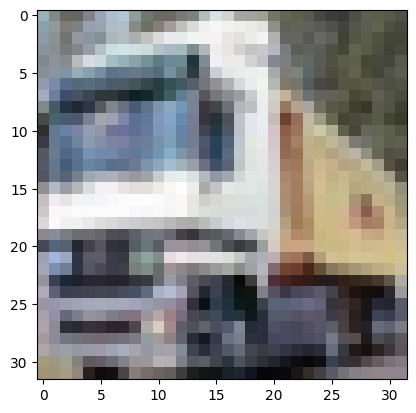

In [ ]:
plt.imshow(x_train[1])

Plot a grid of 2x3 images. To see the classes, visit https://www.cs.toronto.edu/~kriz/cifar.html

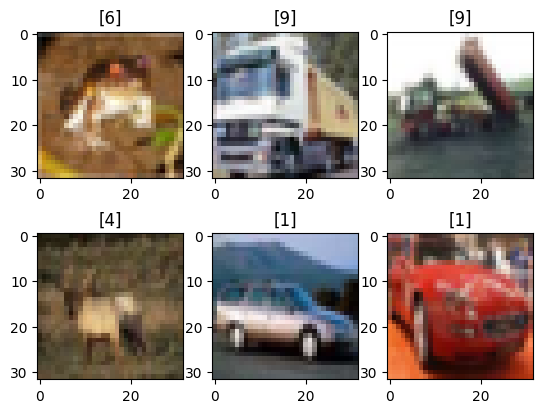

In [ ]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.title(str(y_train[i]))
  plt.imshow(x_train[i])

Normalize the data

In [ ]:
x_train, x_test = x_train/255, x_test/255

In [ ]:
x_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

Change to one-hot encoding

In [ ]:
encoded_train = to_categorical(y_train)
encoded_test = to_categorical(y_test)

Verify *encoded*

In [ ]:
encoded_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Build the model

In [ ]:
model = Sequential([InputLayer(input_shape=(32,32,3)),
                    Conv2D(6, kernel_size=(3,3), padding='same',activation='relu'), #padding='valid', padding='same', stride=(1,1)
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(16, kernel_size=(3,3),padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Flatten(),
                    Dropout(0.2),
                    Dense(120, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 6)         168       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 16)        880       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dropout_7 (Dropout)         (None, 1024)             

## Compile the Model

Define the optmizer, loss, metric

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')

#### Setting Callbacks

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

**ModelCheckpoint**: Save the Keras model or model weights at some frequency.

In [ ]:
callback = [ModelCheckpoint('models/best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)]

#Training the Model

In [ ]:
history = model.fit(x_train, encoded_train,
                    epochs=100,
                    batch_size=256,
                    validation_data=(x_test, encoded_test),
                    callbacks=callback)

Epoch 1/100
196/196 [==============================] - ETA: 0s - loss: 2.2887 - accuracy: 0.1270
Epoch 1: val_accuracy improved from -inf to 0.18160, saving model to models/best_model.h5
196/196 [==============================] - 4s 12ms/step - loss: 2.2887 - accuracy: 0.1270 - val_loss: 2.2516 - val_accuracy: 0.1816
Epoch 2/100
195/196 [============================>.] - ETA: 0s - loss: 2.2236 - accuracy: 0.1692
Epoch 2: val_accuracy improved from 0.18160 to 0.23250, saving model to models/best_model.h5
196/196 [==============================] - 2s 8ms/step - loss: 2.2235 - accuracy: 0.1693 - val_loss: 2.1549 - val_accuracy: 0.2325
Epoch 3/100
191/196 [============================>.] - ETA: 0s - loss: 2.1185 - accuracy: 0.2175
Epoch 3: val_accuracy improved from 0.23250 to 0.27150, saving model to models/best_model.h5
196/196 [==============================] - 2s 8ms/step - loss: 2.1180 - accuracy: 0.2179 - val_loss: 2.0330 - val_accuracy: 0.2715
Epoch 4/100
196/196 [==================

### Viewing the Results

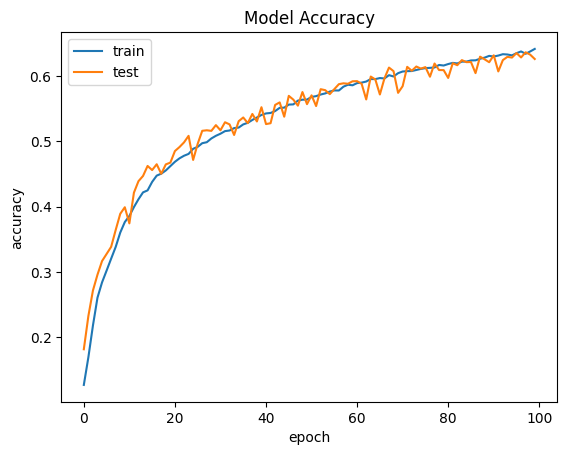

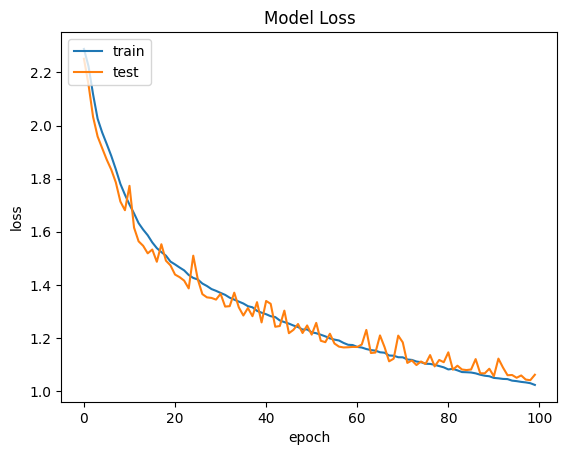

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate the model

### Load the best model saved

In [ ]:
model_best = tf.keras.models.load_model('models/best_model.h5')

### Evaluate data test

In [ ]:
scores = model_best.evaluate(x_test, encoded_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0432 - accuracy: 0.6362


### Predict the classes

In [ ]:
predictions = model_best.predict(x_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[8.6773457e-03, 2.1925139e-01, 6.3196979e-02, ..., 6.8602531e-04,
        1.5546093e-02, 2.7082037e-02],
       [1.0661383e-01, 6.0490775e-01, 1.0238787e-04, ..., 8.1318722e-06,
        2.8561342e-01, 2.6167512e-03],
       [1.3571712e-01, 2.8009692e-01, 4.4363691e-03, ..., 3.0334620e-03,
        4.4819608e-01, 1.2326521e-01],
       ...,
       [5.5808313e-03, 4.9930182e-04, 4.3710429e-02, ..., 2.4425680e-02,
        1.5635962e-03, 6.7078066e-03],
       [3.2704449e-01, 5.1718050e-01, 1.5300974e-02, ..., 2.2614377e-03,
        5.5039534e-03, 7.9736412e-03],
       [7.5686653e-04, 1.4888741e-03, 5.7397378e-03, ..., 9.0099531e-01,
        4.0251695e-04, 1.4024791e-03]], dtype=float32)

# Confusion Matrix


Import the libraries:

> from sklearn.metrics import confusion_matrix

> import seaborn as sns


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Change *y* to the classes values

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_pred.shape

(10000,)

In [ ]:
y_pred

array([3, 1, 8, ..., 5, 1, 7])

Generate confusion matrix




In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[730,  55,  32,  11,   8,   5,  10,   6, 117,  26],
       [ 54, 824,   6,   4,   2,   6,   6,   2,  33,  63],
       [124,  36, 510,  78,  58,  63,  61,  28,  27,  15],
       [ 54,  61,  84, 416,  47, 141,  77,  31,  43,  46],
       [ 82,  35, 115,  79, 426,  50,  88,  89,  27,   9],
       [ 35,  25,  91, 241,  40, 433,  26,  61,  27,  21],
       [ 20,  42,  61,  90,  33,  20, 682,  13,  15,  24],
       [ 59,  37,  44,  67,  46,  65,  11, 615,  16,  40],
       [ 96,  78,  10,  13,   4,   2,   2,   4, 761,  30],
       [ 71, 261,   8,  14,   2,  13,  10,  11,  51, 559]])

Show the confusion matrix wiht seaborn. Visit https://seaborn.pydata.org/

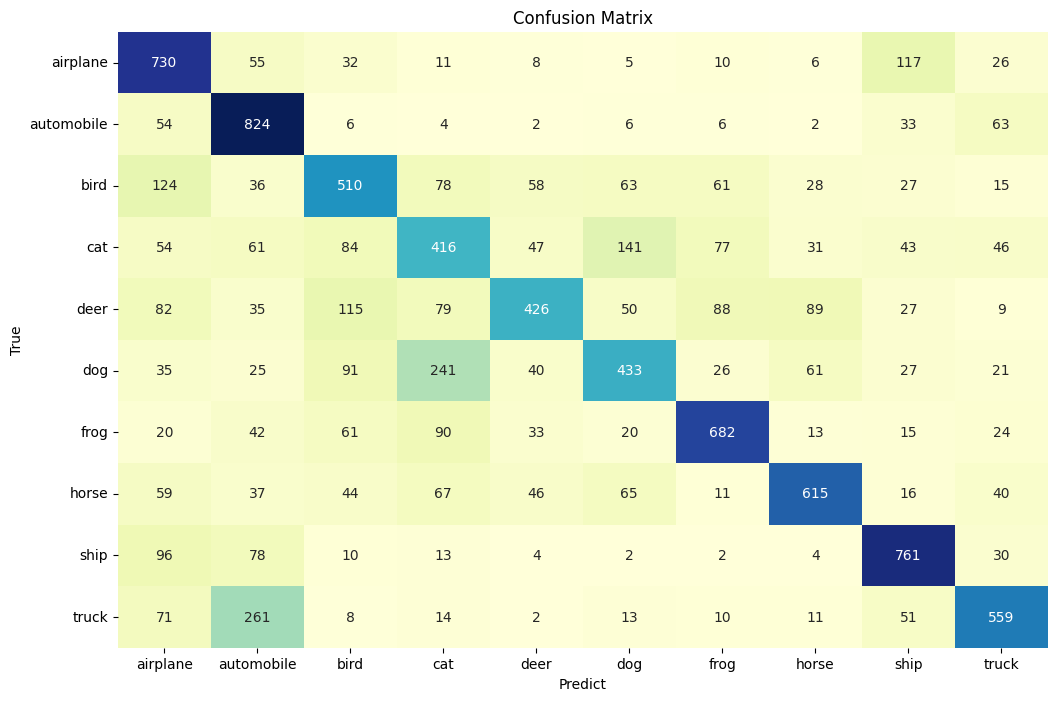

In [ ]:
labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

plt.subplots(figsize=(12,8))
sns.heatmap(cm, cmap='YlGnBu',
           annot=True,
           fmt='d',
           cbar=False,
           xticklabels=labels,
           yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("True")
plt.show()